In [108]:
from math import sin
import numpy as np
import matplotlib.pyplot as plt 
def rk4_sim(f, r0, a, b, N=100):
    ''' Solves coupled ODE using fourth-order Runge-Kutta 
    f = function in x,t 
    x0 = initial condition
    a = starting point
    b = endpoint 
    N = number of steps
    '''
    h = (b-a)/N 
    tpoints = np.arange(a,b,h)
    result_list = []
    for i in range(len(r0)):
        result_list.append([])
    r = np.array(r0,float)
    for t in tpoints:
        for i in range(len(r0)):
            result_list[i].append(r[i])
        k1 = h*f(r,t)
        k2 = h*f(r+0.5*k1,t+0.5*h)
        k3 = h*f(r+0.5*k2,t+0.5*h)
        k4 = h*f(r+k3,t+h)
        r += (k1+2*k2+2*k3+k4)/6 
    result_list=np.vstack((tpoints, result_list))
    return result_list
    

In [104]:
def g(r,t):
    x = r[0]
    y = r[1]
    fx = x*y - x
    fy = y - x*y + sin(t)**2
    return np.array([fx,fy],float)
# rk4_sim(g, [1,1], 0, 10, N=1000)

In [110]:
def throw(r,t):
    x,v = r[0], r[1]
    fv = -9.81
    fx = v
    return np.array([fx, fv], float)
a=rk4_sim(throw, [0.0, 49.05], 0., 10., 1000)
a[1][-1]

0.49000949999771676

In [130]:
def f(r,t):
    x = r[0]
    y = r[1]
    fx = y
    fy = -9.81
    return np.array([fx,fy],float)

a = 0.0
b = 10.0
N = 1000
h = (b-a)/N

tpoints = np.arange(a,b,h)
xpoints = []
ypoints = []

r = np.array([0, 49.05],float)
for t in tpoints:
    xpoints.append(r[0])
    ypoints.append(r[1])
    k1 = h*f(r,t)
    k2 = h*f(r+0.5*k1,t+0.5*h)
    k3 = h*f(r+0.5*k2,t+0.5*h)
    k4 = h*f(r+k3,t+h)
    # print(k4)
    r += (k1+2*k2+2*k3+k4)/6 
print(np.array(xpoints)[-1])

0.49000949999771676


In [88]:
def f(r,t):
    x = r[0]
    y = r[1]
    fx = x*y - x
    fy = y - x*y + sin(t)**2
    return np.array([fx,fy],float)

a = 0.0
b = 10.0
N = 1000
h = (b-a)/N
r0 = [1.0,1.0]

tpoints = np.arange(a,b,h)
result_list = []
for i in range(len(r0)):
    result_list.append([])

r = np.array([1.0,1.0],float)
for t in tpoints:
    for i in range(len(r0)):
        result_list[i].append(r[i])
    k1 = h*f(r,t)
    k2 = h*f(r+0.5*k1,t+0.5*h)
    k3 = h*f(r+0.5*k2,t+0.5*h)
    k4 = h*f(r+k3,t+h)
    r += (k1+2*k2+2*k3+k4)/6 
print(result_list[0][-1])

1.4319804368907307


In [93]:
def throw(r,t):
    x,v = r[0], r[1]
    fv = -9.81
    fx = v
    return np.array([fx, fv], float)
rk4_sim(throw, [0.0, 49.05], 0., 10., 1000)[2][-1]

-97.00190000000134

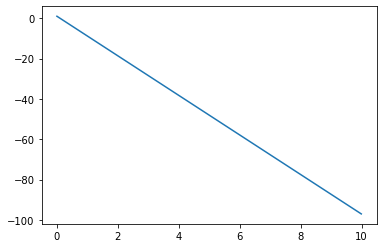

In [106]:
plt.plot(a[0], a[2])

In [120]:
g = 9.81         # Acceleration due to gravity
a = 0.0          # Initial time
b = 10.0         # Final time
N = 1000         # Number of Runge-Kutta steps
h = (b-a)/N      # Size of Runge-Kutta steps
target = 1e-10   # Target accuracy for binary search

# Function for Runge-Kutta calculation
def f(r):
    x = r[0]
    y = r[1]
    fx = y
    fy = -g
    return np.array([fx,fy],float)

# Function to solve the equation and calculate the final height
def height(v):
    r = np.array([0.0,v],float)
    for t in np.arange(a,b,h):
        k1 = h*f(r)
        k2 = h*f(r+0.5*k1)
        k3 = h*f(r+0.5*k2)
        k4 = h*f(r+k3)
        r += (k1+2*k2+2*k3+k4)/6
    print(r)
    return r[0]

# Main program performs a binary search
v1 = 0.01
v2 = 1000.0
h1 = height(v1)
h2 = height(v2)

while abs(h2-h1)>target:
    vp = (v1+v2)/2
    hp = height(vp)
    if h1*hp>0:
        v1 = vp
        h1 = hp
    else:
        v2 = vp
        h2 = hp

v = (v1+v2)/2
print("The required initial velocity is",v,"m/s")

[-490.40000000000384  -98.09000000000137]
[9509.499999999776   901.8999999999551]
[4509.550000000058   401.9050000000119]
[2009.5750000000596  151.9075000000119]
[759.5874999999885   26.90874999999788]
[134.5937499999952  -35.59062500000045]
[-177.90312499999925  -66.84031250000048]
[-21.65468750000192  -51.215468750000454]
[ 56.469531249996635 -43.403046875000456]
[ 17.407421874997357 -47.309257812500455]
[ -2.1236328125022776 -49.26236328125045  ]
[  7.641894531247521 -48.28581054687545 ]
[  2.759130859372644 -48.77408691406295 ]
[  0.3177490234351139 -49.01822509765671  ]
[ -0.9029418945336272 -49.140294189453584 ]
[ -0.2925964355492312 -49.07925964355515  ]
[ 1.2576293942965222e-02 -4.9048742370605929e+01]
[ -0.1400100708030976 -49.06400100708053  ]
[ -0.0637168884300805 -49.05637168884323  ]
[-2.5570297243604767e-02 -4.9052557029724582e+01]
[-6.497001650239531e-03 -4.905064970016525e+01]
[ 3.0396461462889879e-03 -4.9049696035385594e+01]
[-1.7286777519631702e-03 -4.9050172867775423

In [119]:
height(49.05)

TypeError: f() missing 1 required positional argument: 't'

In [133]:
from scipy.integrate import solve_ivp 

def f(t,r):
    x = r[0]
    y = r[1]
    fx = y
    fy = -9.81
    return np.array([fx,fy],float)

solve_ivp(f, (0,10), [0,49.05], 'RK45', vectorized=True).y[1][-1]

C:\Users\Ron\AppData\Local\Temp/ipykernel_23316/86365304.py:8: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  return np.array([fx,fy],float)


-49.05

In [ ]:
def rk4_sim(f, r0, a, b, N=100):
    h = (b-a)/N 
    tpoints = np.arange(a,b,h)
    result_list = []
    for i in range(len(r0)):
        result_list.append([])
    r = np.array(r0,float)
    for t in tpoints:
        for i in range(len(r0)):
            result_list[i].append(r[i])
        k1 = h*f(r,t)
        k2 = h*f(r+0.5*k1,t+0.5*h)
        k3 = h*f(r+0.5*k2,t+0.5*h)
        k4 = h*f(r+k3,t+h)
        r += (k1+2*k2+2*k3+k4)/6 
    result_list=np.vstack((tpoints, result_list))
    return result_list

In [ ]:
def rk4_sim(f, r0, a, b, N=1000):
    h = (b-a)/N 
    ts = np.linspace(a,b,N)
    r=np.array([r0], float)
    for t in np.arange(0,N-1,1): 
        k1 = h*f(ts[t], r[t]) 
        k2 = h*f(ts[t] + h/2, r[t] + k1/2) 
        k3 = h*f(ts[t] + h/2, r[t] + k2/2) 
        k4 = h*f(ts[t] + h, r[t] + k3) 
        to_add = (r[t] + (k1+2*k2+2*k3+k4)/6).reshape(1,len(r0))
        r=np.append(r, to_add, axis=0)
    ts=ts.reshape(len(ts),1) 
    return np.hstack((ts, r))